<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта--«Культурист-датасаентист»" data-toc-modified-id="Описание-проекта--«Культурист-датасаентист»-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта  «Культурист-датасаентист»</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-базовые-рекомендации-по-работе-с-клиентами-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

## Описание проекта  «Культурист-датасаентист»

**Цель:** Для фитнес-центра `«Культурист-датасаентист»` **провести анализ оттока клиентов**, чтобы подготовить план действий по удержанию клиентов. Данная модель будет использоваться менеджментом фитнес-центра для проведения процедур по удержанию клиентов.

**Задачи:**
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    * 1) выделить целевые группы клиентов;
    * 2) предложить меры по снижению оттока;
    * 3) определить другие особенности взаимодействия с клиентами.

**Входные данные на месяц до оттока и факт оттока на определённый месяц.**

**Данные клиента за предыдущий до проверки факта оттока месяц:**
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* 'Churn' — факт оттока в текущем месяце.

**Постановка задачи в терминах ML**
1. Тип задачи: 
    * научиться прогнозировать вероятность оттока - обучение с учителем, регресиия; 
    * сформировать типичные портреты клиенто - обучение без учителя, классификация;
2. Churn - целевая переменная, остальное - признаки
3. Временной структура в данных нет 

## Загрузка данных

In [1]:
# Загрузим библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from itertools import combinations

In [2]:
# Загрузим данные
path ='/datasets/rest_data.csv'
try:
    df =  pd.read_csv('gym_churn.csv')
except FileNotFoundError as e:
    print(repr(e))
    rest_data = pd.read_csv(path)

In [3]:
# Посмотрим входные данные
print(df.shape)
df.info()
df.head(5)

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-n

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# Названия столбцов переведем в нижний регистр
df.columns = df.columns.str.lower()

In [5]:
# Проверим дубли
df.duplicated().sum()

0

**Предвариаельные выводы по качеству данных:**
* Качество данных кажется приемлемым - пропусков нет, дублей нет, тип данных менять не нужно - все типы числовые
* Размер выборки в 4000 записей кажется достаточном для анализа
* Данные предоставлены за месяц
* Названия колонок были переведены в нижний регистр

## Исследовательский анализ данных (EDA)

In [6]:
# Проверим, что все колонки заполнены верно
print(df['gender'].value_counts())
print(df['near_location'].value_counts())
print(df['partner'].value_counts())
print(df['promo_friends'].value_counts())
print(df['phone'].value_counts())
print(df['contract_period' ].value_counts())
print(df['group_visits' ].value_counts())
df['churn'].value_counts()

1    2041
0    1959
Name: gender, dtype: int64
1    3381
0     619
Name: near_location, dtype: int64
0    2053
1    1947
Name: partner, dtype: int64
0    2766
1    1234
Name: promo_friends, dtype: int64
1    3614
0     386
Name: phone, dtype: int64
1     2207
12     960
6      833
Name: contract_period, dtype: int64
0    2351
1    1649
Name: group_visits, dtype: int64


0    2939
1    1061
Name: churn, dtype: int64

In [7]:
# Узнаем как распределены данные по каждому признаку
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* В клубе приблизительно одинаковое кол-во мужчин и женщин
* Большинство клинетов проживают или работаботают в районе клуба
* Половина клиентов появилась через сотрудничество и чуть меньше половины через акцию "приведи друга"
* Большая часть конкрактов - это месячные контракты
* Средний возраст клиента - 30 лет
* Дополнительная выручка на клинета не большая - 146р
* Кажется, что в финтес-ценре дольшая текучка клиентов, так как средний lifetime 3.7 месяца
* Кол-во посещений в неделю за последний месяц становится меньше относительно данных за все периоды
* В среднем в неделю посещают финтес-ценр 1,8 раз
* Отток клиентов на прошлый месяц составил одну четверную часть

In [8]:
# Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
df_mean = df.groupby('churn').mean().T
df_mean['ratio'] = df_mean[1] / df_mean[0]
df_mean

churn,0,1,ratio
gender,0.510037,0.510839,1.001571
near_location,0.873086,0.768143,0.879802
partner,0.534195,0.355325,0.665160
promo_friends,0.353522,0.183789,0.519880
phone,0.903709,0.902922,0.999129
contract_period,5.747193,1.728558,0.300766
group_visits,0.464103,0.268615,0.578782
age,29.976523,26.989632,0.900359
avg_additional_charges_total,158.445715,115.082899,0.726324
month_to_end_contract,5.283089,1.662582,0.314699


Видно, что признаки Пол и Телефон практически однаковые в обоих групах. Посмотрим корреляцию с целевой переменной и если она минимальны - удалим их

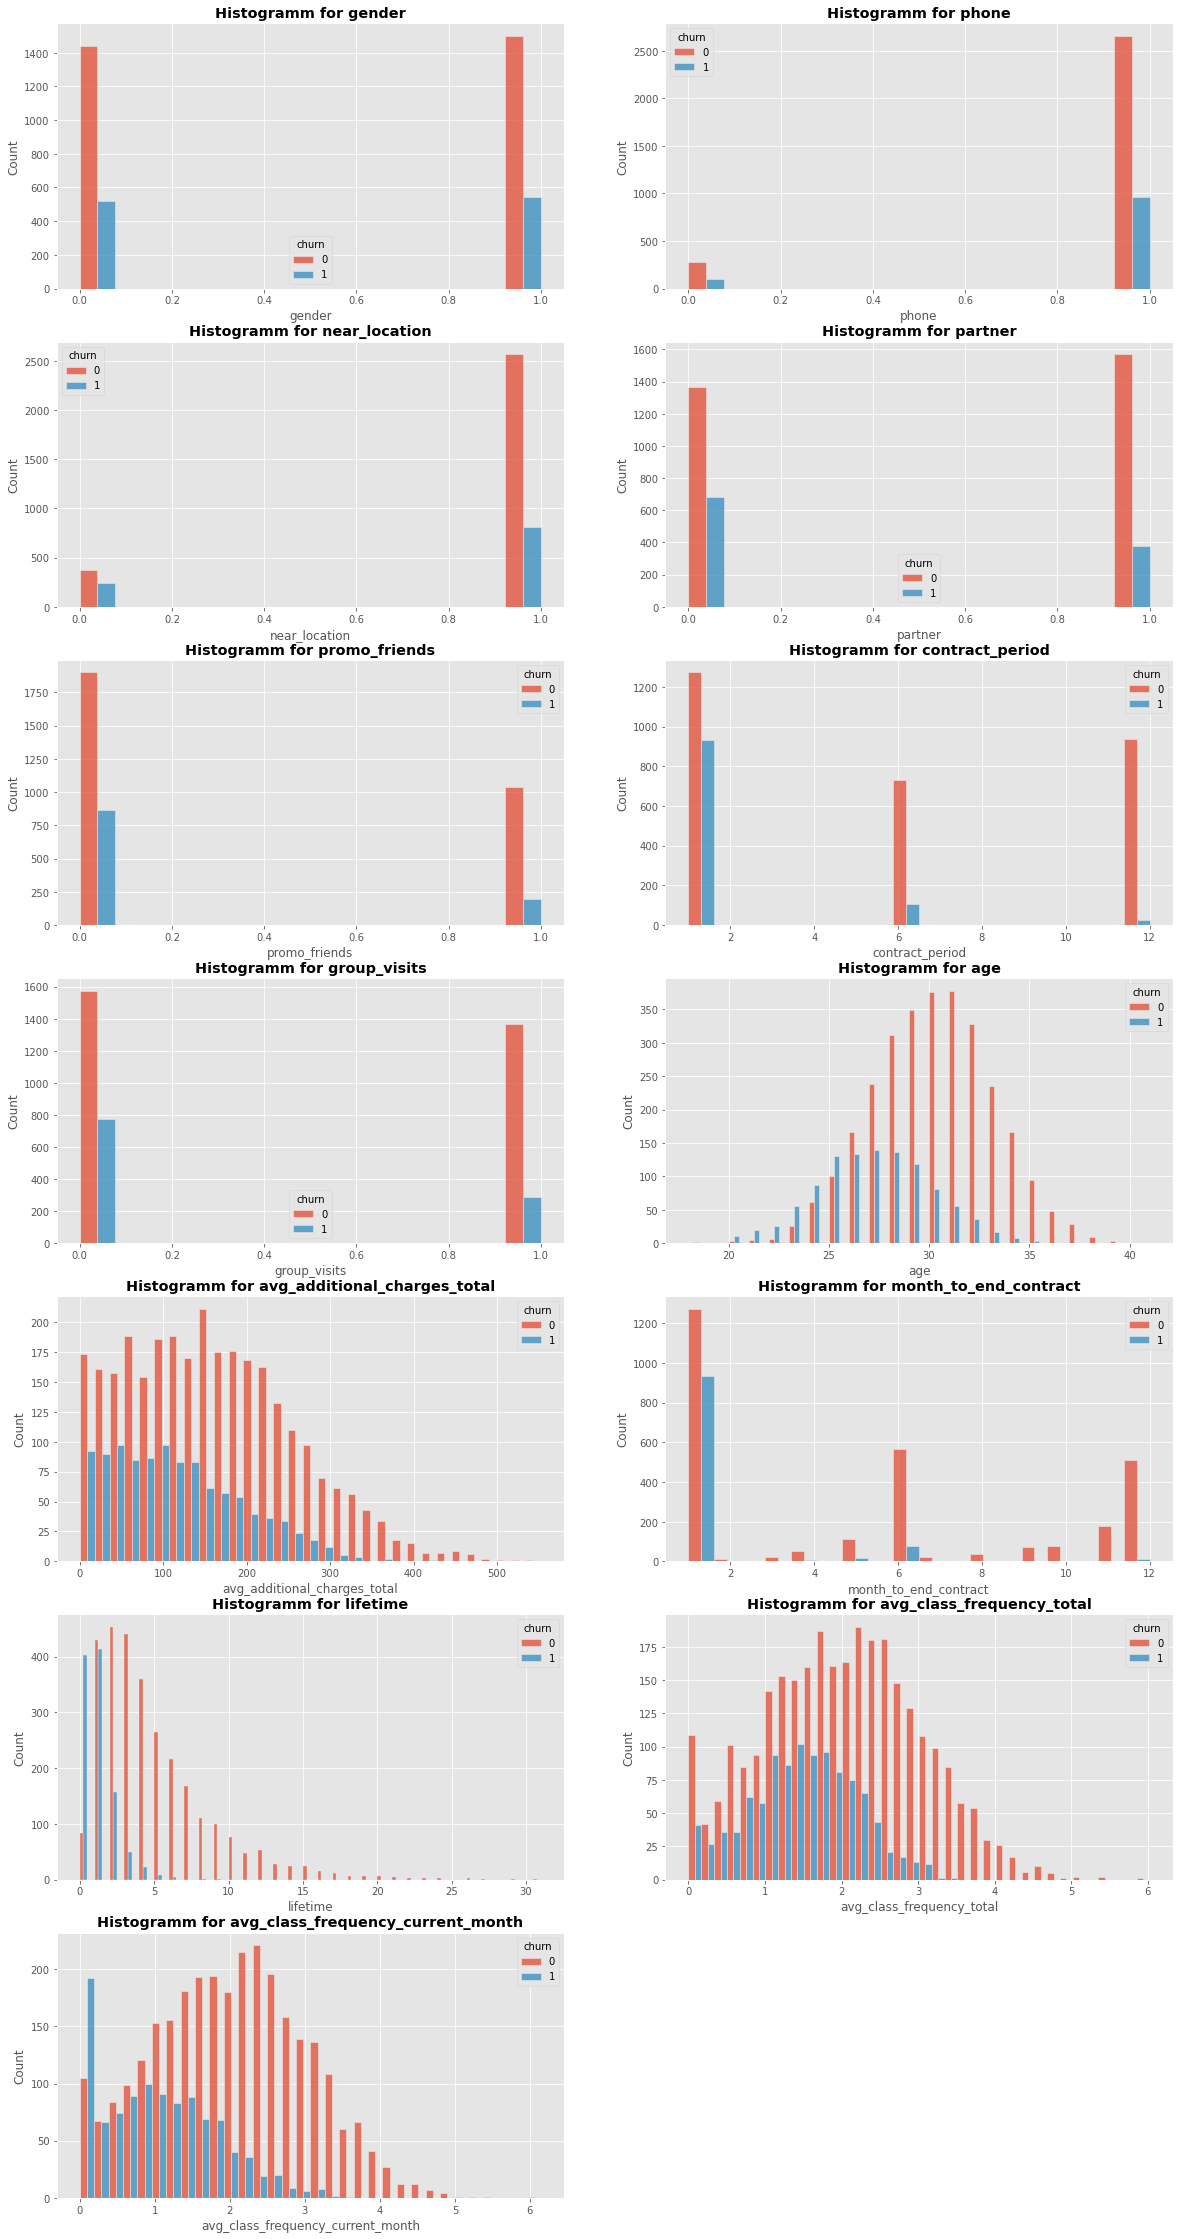

In [9]:
# Для каждого значимого признака построим столбчатые гистограммы
feature = ['gender', 'phone', 'near_location', 'partner', 'promo_friends','contract_period', 'group_visits', 'age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

plt.figure(figsize=(20, 40))
n=1
for i in feature:
    with plt.style.context('ggplot'):
        ax_n = plt.subplot(7, 2, n)
        sns.histplot(data=df, x=i,  hue="churn", multiple="dodge", ax=ax_n)
        plt.title('Histogramm for '+i,  fontweight='bold')
        n += 1
plt.show() 

* Клиенты со сроком действия контракта месяц значитеьно чаще пикидают фитнесс центр
* Если Клиент анимается более 6 месяцев, то он менее всего подвержен оттоку
* Если Клиенты перестают ходить в клуб (в том числе и на групповые занятия), то они больше подведжены оттоку
* Чаще всего покидают фитнес центр в последний месяц действия контакта, но тут могут быть другие предпосылки, что большинство контрактов месячные и потенциально именно эти контакты берут люди, которые уходят

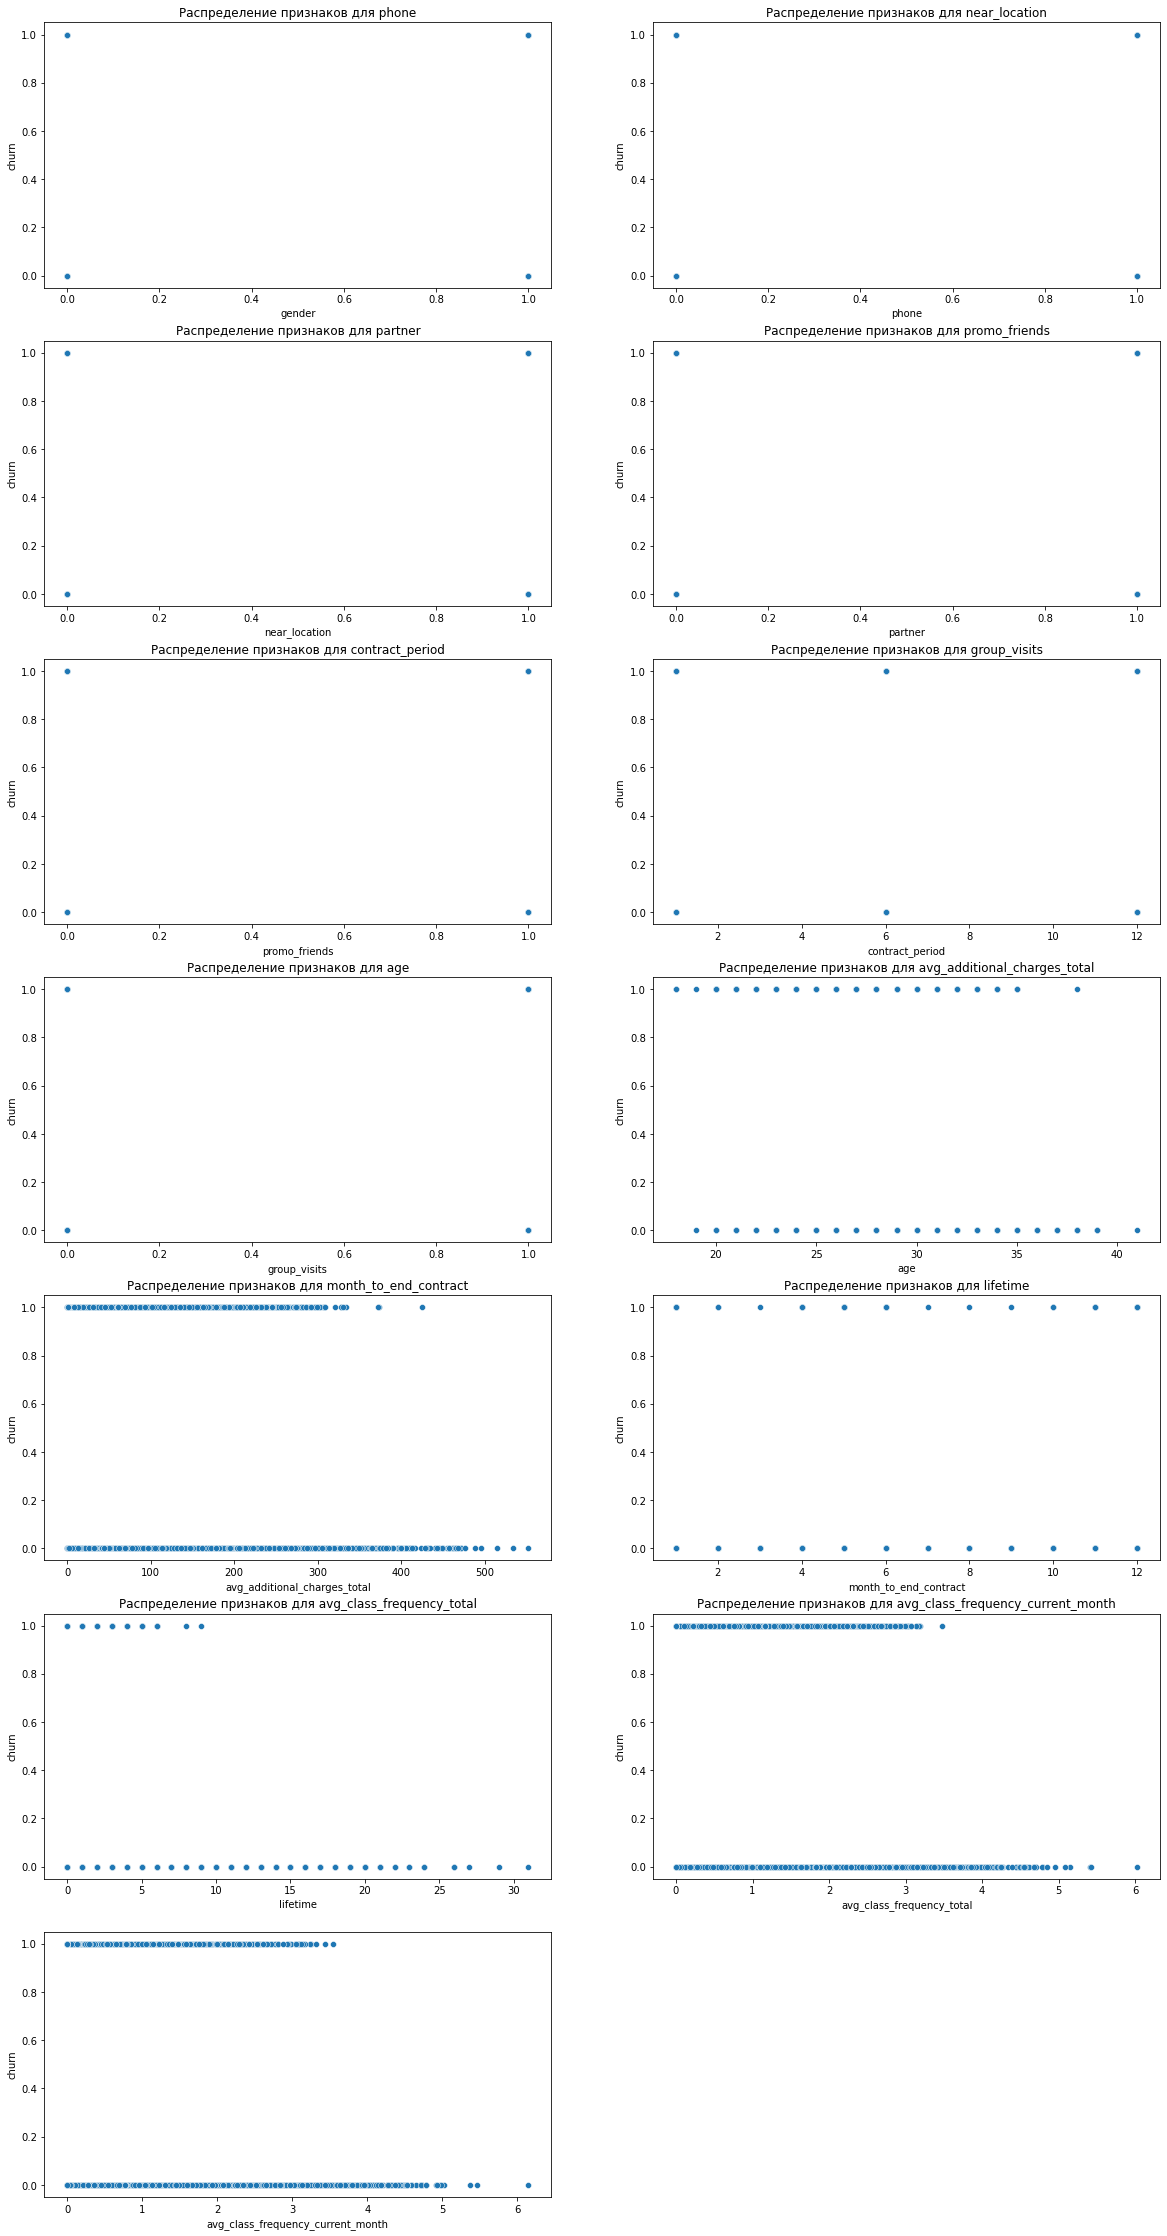

In [10]:
# Посмотрим распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)
plt.figure(figsize=(20, 40))
n=1
for i in feature:
    ax_n.set(title='Распределение признаков для ' + i)
    ax_n = plt.subplot(7, 2, n)
    sns.scatterplot(y=df['churn'], x=df[i], ax=ax_n) 
    n += 1
plt.show()

Качетво данных хорошее, ярких выбросов нет, все признаки потенциально можно использовать в модели

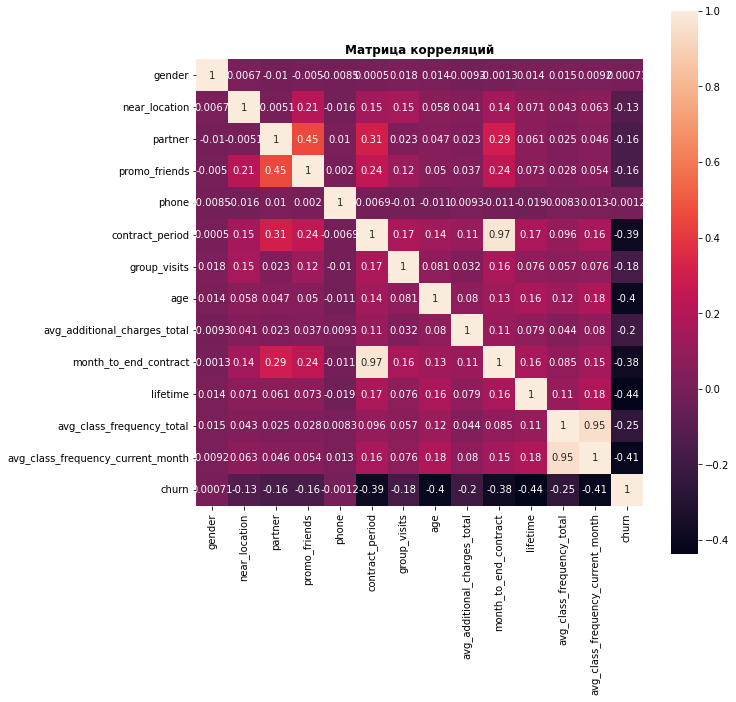

In [11]:
# Построим график корреляций
cm = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляций', fontweight='bold')
plt.show()

* Корреляция пола и наличия телефона назначительная с целевой переменной, по этому предлагаю эти признаки удалить

* Видна явная корреляция между собой признаков `contract_period` и `month_to_end_contract` и при этом они сильно влияют на целевую переменную. Чем дольше контакт, тем больше месяцев до конца. Но так как клиенты чаще покидают фитнес в последий месяц (хотя месячные контакты самые уходимые) предлагаю этот пизнак не удалять

* Есть корреляция частоты посещений - если клиент посещал фитнес редко, то и в последний месяц он будет посещать его редко. Параметры не удаляем, так как они влияют на целевую переменную

* Интресная корреляция контактов приведенных через партнера и по приглашению друзей. Она скорее всего показывает, что в клуб ходят коллеги  по работе, которые привели друг друга. Тут ничего удалять не будем, тк корреляция меньше 0,5

**Вывод по результатам EDA:**
* Данные, которые предлагается исключить из оценки качества модели: `gender`, `phone`
* Наиболее ценными для модели признаками могут быть: `contract_period`, `age`, `month_to_end_contract`, `lifetime`, `avg_class_frequency_current_month`
* какие полезные признаки можно попробовать сгенерировать самостоятельно на основе уже имеющихся (?)

## Модель прогнозирования оттока клиентов

In [21]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(['gender', 'phone', 'churn' ], axis = 1)
y = df['churn']

In [22]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
X_train.shape

(3200, 11)

In [24]:
X_test.shape

(800, 11)



<div class="alert alert-block alert-warning"; style="border-left: 6px solid orange">
<b>Рекомендация ⚠️</b>
       
Лучше всегда проверять размеры выборок после разделения)
    
</div>


In [ ]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)  # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки 
X_st = scaler.fit_transform(X) # обучаем scaler и одновременно трансформируем матрицу для всей выборки


X_test_st = scaler.transform(X_test)

In [15]:
# зададим список моделей
models = [LogisticRegression(), RandomForestClassifier()]

In [16]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred)))

In [17]:
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)


LogisticRegression()
Accuracy:0.92 Precision:0.85 Recall:0.83 
RandomForestClassifier()
Accuracy:0.92 Precision:0.86 Recall:0.82 


Text(0, 0.5, 'Mean decrease in impurity')

<Figure size 720x720 with 0 Axes>

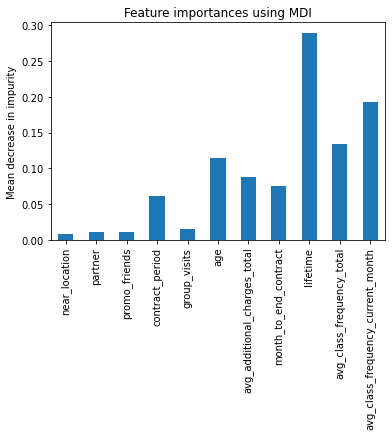

In [34]:
model = models[1]
model.fit(X_train, y_train)

importances = model.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)

plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

**Вывод:**
* Доля правильных ответов (accuracy) у обоих моделей одинаковая
* Но модель `LogisticRegression`среди всех правильных ответов обнаруживает большее кол-во и точность у нее выше
* Важные признаки модели подтвердились: `lifetime`, `avg_class_frequency_current_month`, `avg_class_frequency_current_total`, `age`

## Кластеризация клиентов

In [19]:
# Построим матрицу расстояний
linked = linkage(X_st, method = 'ward') 

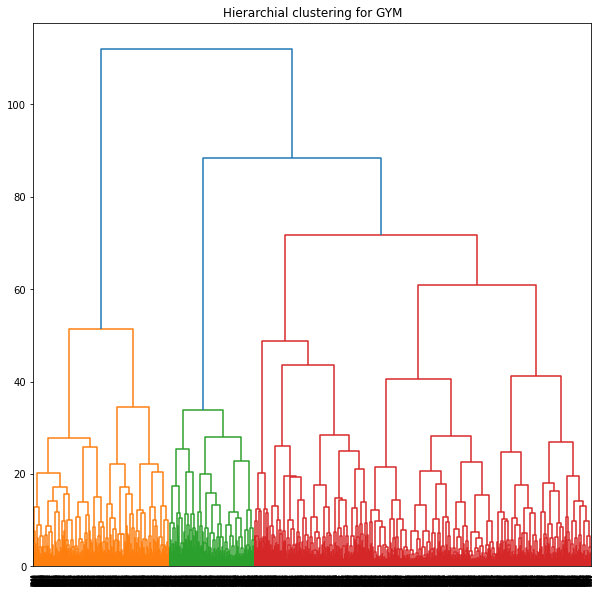

In [20]:
# Нарисуем дендрограмму
plt.figure(figsize=(10, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

На основании полученного графика выделяется 5 кластеров 

In [21]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X_st)

In [22]:
# сохраняем метки кластера в поле нашего датасета
df['client_cluster'] = labels
# выводим статистику по средним значениям наших признаков по кластеру
df.groupby('client_cluster').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
client_cluster,,,,,,,,,,,,,,
0,0.492308,0.998462,0.816923,1.000000,0.896923,3.136923,0.453846,29.220000,141.794240,2.903077,3.729231,1.746066,1.642257,0.246154
1,0.557181,0.968085,0.267287,0.086436,0.906915,2.929521,0.469415,30.251330,163.541822,2.688830,5.230053,2.898474,2.901665,0.057181
2,0.500000,1.000000,0.241563,0.020426,0.901421,1.960036,0.328597,28.193606,130.881531,1.877442,2.384547,1.291018,1.050202,0.525755
3,0.504301,0.944086,0.740860,0.488172,0.901075,11.909677,0.552688,29.909677,164.414251,10.905376,4.681720,1.992546,1.984128,0.022581
4,0.498155,0.000000,0.468635,0.077491,0.915129,2.214022,0.215867,28.474170,133.482191,2.077491,2.773063,1.650793,1.459266,0.452030


Не все признаки влияют на кластеризацию. Наример не влияют: gender, phone, age, avg_additional_charges_total.
Остальные выводы после диаграммы распределений

In [23]:
# определим функцию отрисовки графиков попарных признаков для кластеров
#def show_clusters_on_plot(df, x_name, y_name, cluster_name):
#    plt.figure(figsize=(5, 5))
#    sns.scatterplot(
#        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired')
#    plt.title('{} vs {}'.format(x_name, y_name))
#    plt.show()
# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
#col_pairs = list(combinations(df.drop('client_cluster', axis=1).columns, 2))
#for pair in col_pairs:
#    show_clusters_on_plot(df, pair[0], pair[1], 'client_cluster')

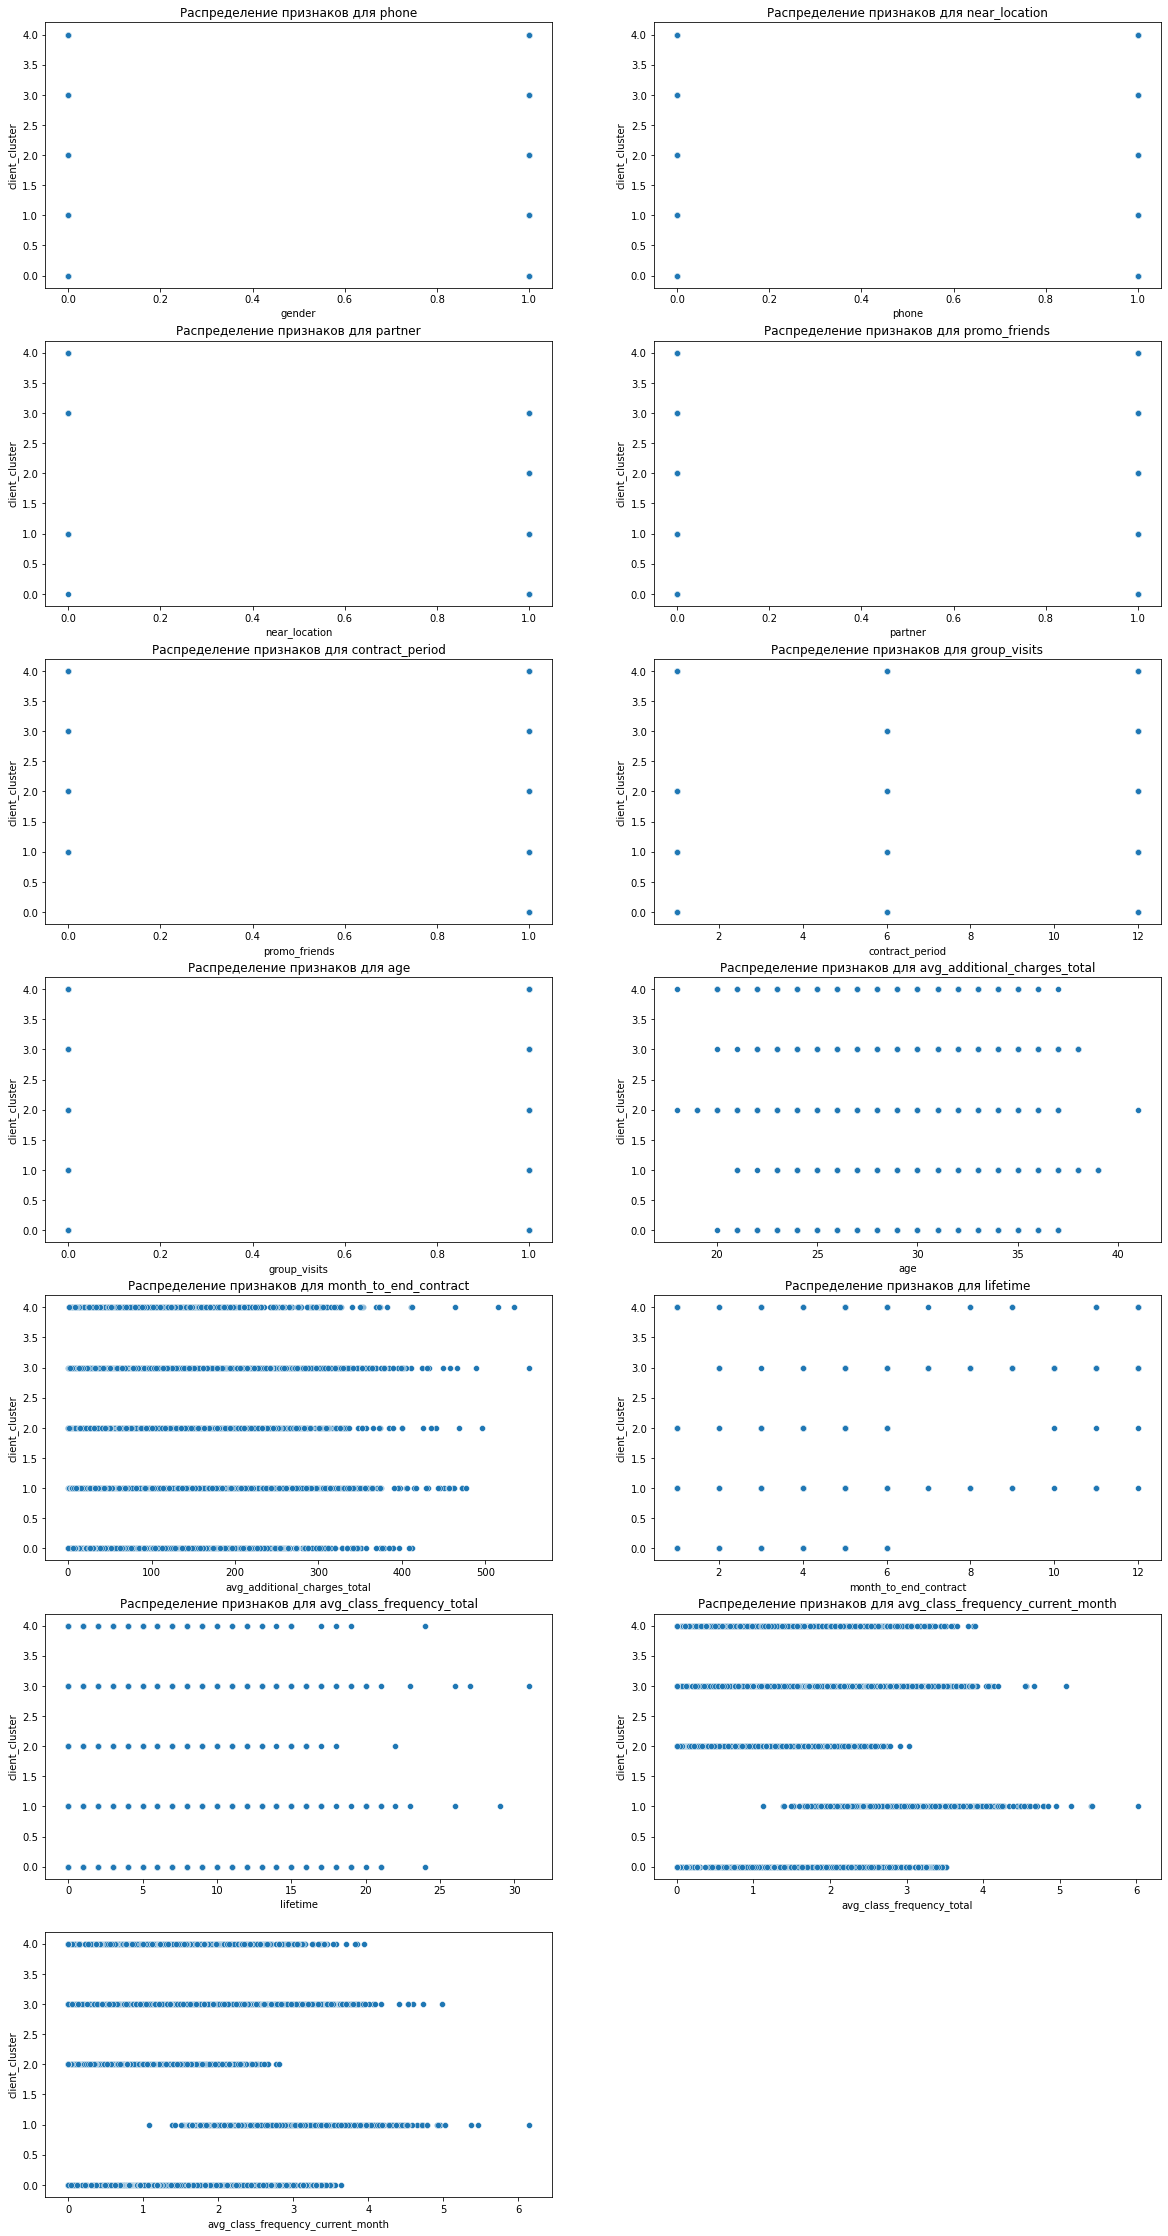

In [24]:
# Посмтрим распределения признаков для кластеров
plt.figure(figsize=(20, 40))
n=1
for i in feature:
    ax_n.set(title='Распределение признаков для ' + i)
    ax_n = plt.subplot(7, 2, n)
    sns.scatterplot(y=df['client_cluster'], x=df[i], ax=ax_n) 
    n += 1
plt.show()

* Можно заметить, что модель выделила 2 кластера клиентов, кототорые скорее всего не уйдут и близко живут\работают с фитнесом, но отличаются по периоду контракта
* Остальные группы имеют не большой lifetime и при этом не проживают/работают в района фитнеса
* Или если проживают/работают в района фитнеса, то привили ли их друзья или нет

In [25]:
#  Посчитаем сколько всего ушло клиентов за последний месяц
t1 = df[df['churn']==1].groupby(['churn'])['gender'].count()
t1

churn
1    1061
Name: gender, dtype: int64

In [26]:
#  Посчитаем долю оттока для каждого кластера
clients = df[df['churn']==1].groupby(['client_cluster']).count().reset_index()
clients = clients[['client_cluster', 'gender']].rename(columns={'gender':'count_churn_clients'})

clients['dole'] = clients['count_churn_clients'] / 1061 * 100
clients

,client_cluster,count_churn_clients,dole
0,0,160,15.080113
1,1,43,4.052780
2,2,592,55.796418
3,3,21,1.979265
4,4,245,23.091423


* Кластеры 0 и 1 менее всего подвержены оттоку
* Кластер 3 наиболее склонен к оттоку. Это клиеты, которые пришли сами, заключили договор на небольшой период и ходят в фитнес реже всех

## Выводы и базовые рекомендации по работе с клиентами

1. Самые важные показатели оттока - lifetime и частота посещений. Чем дольше клиент занимается спортом, тем вероятнее, что он не уйдет. Нужно постараться мотивировать клинетов посещать занятий и вовлекать в спорт. Предлагаю следующие маркетинговые действия: показывать клиентам прогресс в занятиях, проводить соревнования, предлагать дополнительные услуги.

2. В процессе анализа выделено 5 кластеров клинетов. Наиболее подвержены оттоку клиенты, которые пришли в клуб сами (не по рекоментации или по сорудничеству), заключили договор на небольшой период и ходят в фитнес реже всех. Из этого можно сделать вывод, что клиенты, которые имеют знакомых в клубе чаще его посещают и дольше занимаются. По этоиму предлагается развивать систему рекомендаций и бонусов за это.

3. Клиенты, заключающие контакты на долго, не разрывают его и остаются членеми. Нужно стараться про продаже контакта продавать его на как можно более долгий срок.